## Lab-3: Logistic Regression and Gradient descent
-----

## Introduction 
##### In this lab, we will discuss Logistic Regression (LR). This is a very important problem in machine learning and is applied to solve a variety of real life tasks. For example, financial services such as banks can rely on historical data of customers' credit record for loan approval by humans to automate the decision making process. A logistic regression model can be trained on these data, and then used to predict loan acceptance for future applicants. In particalar in this lab, you will apply Logistic Regression to predict survival on Titanic and learn to analyze classification results. 

### Learning outcomes:
1. Compare classification problem (data) with regression problem (data)
2. Understand the core concepts of LR (sigmoid function and loss function)
3. Manual Feature Selection (are all the features relevant for the task?)
4. Perform data pre-processing and preparation. Which pre-precessing technique should be aplied and why? 
5. Implement Logistic Regression with sklearn
6. Interprete the results of logistic regression (accuracy, confusion matrix, recall, precision, f1-score)
7. Strength and weakness of logistic regression
8. Scaling to multi-class problems
9. LR with gradient descent 
-----

### Concepts Visualization

##### Here are the main equations behind Logistic Regression:


##### Given a data point $(x_i, y_i)$ where $x_i=\{x_i^1,x_i^2, x_i^3,...,x_i^n\}$;  $x_i^j$ represents the feature $j$ and $y_i$ the associated class label.

#### Considering the hypothesis function $f(x_i) = \beta_0 + \beta_1 x_i^1 + + \beta_2 x_i^2 + ... + \beta_n x_i^n$ the output the LR model is the sigmoid function applied to $f(x_i)$, i.e., 


##### $\hat p(x_i) = \frac{e^{f(x_i)}}{1+e^{f(x_i)}} = \frac{1}{1+e^{-f(x_i)}}$

#### Components of the loss function


##### Given the predicted $\hat{p}(x_i)$ of the $x_i$ The loss of classifying the data point  is computed as follow:
 
$L(\hat{p}(x_i), y_i) = \left\{\begin{matrix}
-\log (\hat{p}(x_i)) && y_i = 1\\ 
-\log (1 -\hat{p}(x_i)) && y_i = 0 
\end{matrix}\right.$

$L(\hat{p}(x_i), y_i) = -y_i\log (\hat{p}(x_i)) - (1 - y)_i\log (1 -\hat{p}(x_i))$
 

#### The goal of the LR model is to find the values of the parameters $\{\beta_i\}_{i=0}^{n}$ such that the average loss $L$ on the training dataset is minimized

$\hat y = \left\{\begin{matrix}
1 && \hat p(x) > threshold\\ 
0 && otherwise 
\end{matrix}\right.$

 
### Open Questions
1. What problem does Logistic Regression solve?  
2. What is the output of Logistic Regression model? 
2. Why can't we use average MSE as a loss function (as we did in Linear Regression)?  
3. How can we adapt Logistic Regression to solve a multiclass problem?  
 
Let's now see how the shape of $\hat p(x)$ depend on its parameters for a single feature: $\beta_0 + \beta_1 x_i$:

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

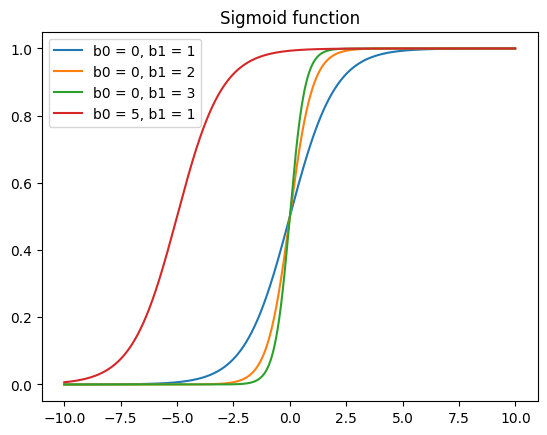

In [57]:
x = np.arange(-10, 10, 0.01)

def plot(b0, b1):
    p = 1 / (1 + np.exp(-(b0 + b1 * x)))
    label = "b0 = {}, b1 = {}".format(b0, b1)
    plt.plot(x, p, label=label)

plot(0,1)
plot(0,2)
plot(0,3)
plot(5,1)
plt.legend()
plt.title('Sigmoid function')
plt.show()

What is controlled by parameters b0, b1?  
<br><br> 
Let's now visualize the components of the Loss function:

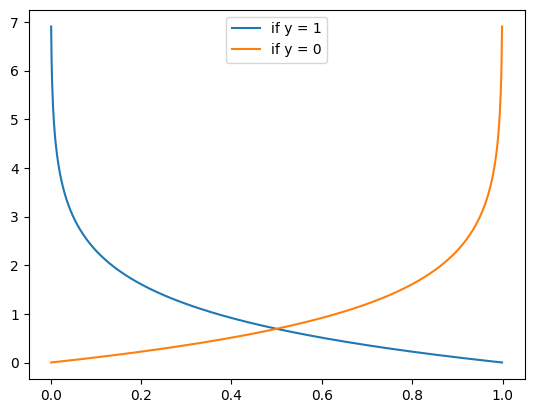

In [58]:
x = np.arange(0.001, 1, 0.001)
y1 = -np.log(x)
y0 = -np.log(1-x)

plt.plot(x,y1, label="if y = 1")
plt.plot(x,y0, label="if y = 0")
plt.legend()
plt.show()

What are the benefits of using logarithms in the loss function?   <br><br>

### Loading Data

In [59]:
import pandas as pd
data = pd.read_csv('titanic.csv')
data

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,S
2,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,151.5500,S
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,151.5500,S
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
1304,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,14.4542,C
1305,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,C
1306,0,3,"Zakarian, Mr. Mapriededer",male,26.50,0,0,7.2250,C
1307,0,3,"Zakarian, Mr. Ortin",male,27.00,0,0,7.2250,C


In [60]:
# removing name column
data = data.drop(['name'], axis = 1)

What do we know about the output class distribution? What percentage of people had survived? Is it important to have the same distribution in test and train sets? Why?

##### Task. Find and print the proporion of the positive (survived) class in the dataset, then split data to train and test sets preserving that proportion. Finally, as a check, calculate and print proportions in resulting sets.

In [61]:
from sklearn.model_selection import train_test_split

X = data.drop(['survived'], axis=1)
y = data.survived

# find and print the proportion of positive samples in data
print('% of positive samples in whole data:', sum(y == 1)/len(y))

# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# find and print the proportion of positive samples in train and test sets, make sure they are approx same
print('% of positive samples in train set:', sum(y_train == 1)/len(y_train))
print('% of positive samples in test set:', sum(y_test == 1)/len(y_test))

% of positive samples in whole data: 0.3819709702062643
% of positive samples in train set: 0.38209606986899564
% of positive samples in test set: 0.3816793893129771


#### Data preprocessing

... is done for you! But you are free to change it if needed.

In [62]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# imputing missing values
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(x_train)
x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
    new_df = pd.concat([df, new_cols], axis=1)    
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(sparse=False, drop='first')
f_names = ['sex', 'embarked']
encoder.fit(x_train[f_names])
x_train = ohe_new_features(x_train, f_names, encoder)
x_test = ohe_new_features(x_test, f_names, encoder)

# feature scaling
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

/home/dale/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/dale/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [63]:
x_train

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0.0,0.755667,0.000,0.111111,0.162314,0.0,0.0,0.0
1,0.0,0.837111,0.000,0.000000,0.051822,1.0,0.0,1.0
2,0.5,0.294150,0.125,0.222222,0.081157,0.0,0.0,0.0
3,0.0,0.945704,0.125,0.111111,0.138583,1.0,0.0,1.0
4,1.0,0.484186,0.000,0.000000,0.014151,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
911,1.0,0.348446,0.000,0.000000,0.015176,1.0,0.0,1.0
912,1.0,0.321298,0.125,0.000000,0.030254,1.0,1.0,0.0
913,1.0,0.280576,0.000,0.000000,0.015713,1.0,0.0,1.0
914,0.0,0.239853,0.125,0.000000,0.117112,0.0,0.0,1.0


### Logistic Regression

Now we are ready to see Logistic Regression in practice. 

#### Task. Fit Logistic Regression and output Accuracy, Precision, and Recall scores on test set.

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics
# fit Logistic Regression
clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

# caclulate and print metrics
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.7811704834605598
0.7253521126760564
0.6866666666666666


What about Logistic Regression Coefficients? Can we interpret them?

In [65]:
print(*[a for a in zip(list(x_train.columns), clf.coef_[0])], sep='\n')

('pclass', -1.6866780984006837)
('age', -1.92003431320399)
('sibsp', -0.9816245296621452)
('parch', -0.7431796193474163)
('fare', 0.3563298529534128)
('sex_male', -2.4407838704132714)
('embarked_Q', -0.40715311105728025)
('embarked_S', -0.5333317755652403)


How can we choose a threshold? Let's try different ones and see their effect on metrics.

#### Task. Calculate Accuracy, Precision, and Recall values for each of the given threshold values and plot them.

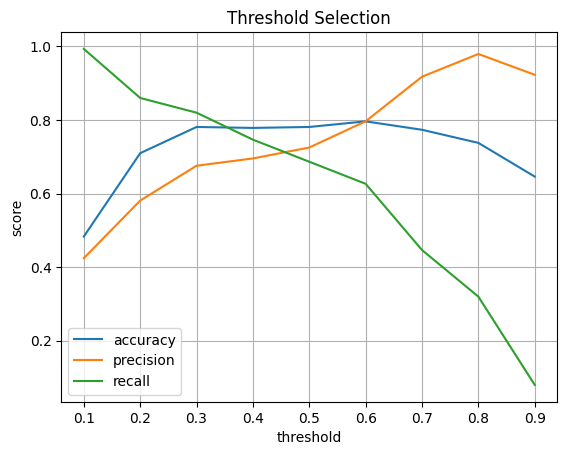

In [66]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# calculate metrics for each threshold above and plot the result as below.
pred_proba = clf.predict_proba(x_test)
results = [[],[],[]]
for i in thresholds:
    y_test_pred_thr = np.where(pred_proba[:, 1] > i, 1, 0)
    results[0].append(metrics.accuracy_score(y_test, y_test_pred_thr))
    results[1].append(metrics.precision_score(y_test, y_test_pred_thr))
    results[2].append(metrics.recall_score(y_test, y_test_pred_thr))
    
plt.plot(thresholds, results[0], label = 'accuracy')   
plt.plot(thresholds, results[1], label = 'precision')   
plt.plot(thresholds, results[2], label = 'recall')
plt.title('Threshold Selection')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.grid()

### Confusion matrix

1. Why one may need confusion matrix? 
2. What new information does it show? 

<table><tr><td><img src='https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png'></td><td><img src='http://wiki.fast.ai/images/6/61/Confusion_matrix.png' style='width: 400px;'></td></tr></table>

<img align='center' src='https://www.researchgate.net/profile/Emanuele_Principi/publication/324226324/figure/fig2/AS:612091408941056@1522945372985/Normalized-confusion-matrix-of-best-performing-models-on-devel-subset-a-SVM.png' style='width: 350px;'>


In [67]:
titanic_true_labels = np.array(y_test)
titanic_pred_labels = y_test_pred_thr

In [68]:
sample_true_labels = np.array([2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0])
sample_pred_labels = np.array([2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2])

#### Task. You need to fill in the function which builds a Confusion Matrix based on true and predicted labels. Your solution should be generalizable to any number of classes. You can assume that classes are represented as numbers (0,1,2,3,...)

In [69]:
def calc_confusion_matrix(true_labels, pred_labels):
    # Calculate a confusion matrix: 
    # True labels along Y axis, Predicted ones along X axis
    cm = None
    
    return cm

titanic_cm = calc_confusion_matrix(titanic_true_labels, titanic_pred_labels)
sample_cm = calc_confusion_matrix(sample_true_labels, sample_pred_labels)
print('Confusion Matrix for Titanic:\n', titanic_cm, '\n')
print('Confusion Matrix for Sample set:\n', sample_cm)

Confusion Matrix for Titanic:
 None 

Confusion Matrix for Sample set:
 None


In [70]:
# Run this block of code to see what your result should look like
from sklearn.metrics import confusion_matrix
print('TRUE Confusion Matrix for Titanic:\n', confusion_matrix(titanic_true_labels, titanic_pred_labels), '\n')
print('TRUE Confusion Matrix for Sample set:\n', confusion_matrix(sample_true_labels, sample_pred_labels))

TRUE Confusion Matrix for Titanic:
 [[242   1]
 [138  12]] 

TRUE Confusion Matrix for Sample set:
 [[4 1 2]
 [3 0 2]
 [1 2 1]]


### <center> Gradient Descent: Losgistic regression with Numpy </center>

In [71]:
import numpy as np
from sklearn.datasets import make_blobs
from IPython.display import clear_output

### Generate dataset

In [72]:
data, labels = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)

### Visualize the data

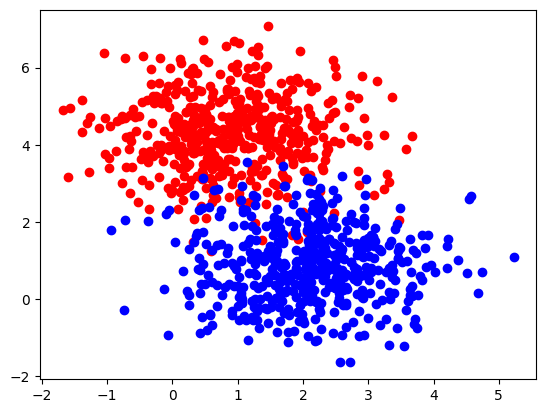

In [73]:
colors = {0:"red", 1:'blue'}
label_values = [0, 1]

for i in label_values:
    idx = np.where(labels == i)
    plt.scatter(data[idx, 0], data[idx, 1], c=colors[i])
plt.show()

### Define the Logistic Sigmoid Function $\sigma(z)$

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [74]:
def sigmoid(x): 
    # return the sigmoid   
    return 1/ (1 + np.exp(-x))

### Compute the Cost Function $J(\theta)$ and Gradient

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [75]:
def compute_cost(theta, x, y):
    m = len(y)
    ## Complete the code to compute the predicted label and error
    y_pred = sigmoid(np.dot(x, theta))  
    error = y*np.log(y_pred) + (1 - y)*np.log(1-y_pred)  
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient # return the total error and the gradient

In [76]:
### Plot the data with decision boundary
def plot_data_with_decision(data, labels, theta):
    colors = {0:"red", 1:'blue'}
    label_values = [0, 1]

    x_boundary = np.array([np.min(data[:, 1]), np.max(data[:, 1])])
    y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

    for i in label_values:
        idx = np.where(labels == i)
        plt.scatter(data[idx, 0], data[idx, 1], c=colors[i])
    plt.plot(x_boundary, y_boundary)
    plt.xlim([-2, 6])
    plt.show()

### Initialize the parameters of the hipothesis 

Initial values of theta : [[0.49256461]
 [1.85075197]
 [1.80813322]]
Initial gradient : [[0.48620473]
 [0.44197233]
 [2.13947252]]
Initial cost 4.966439762880178


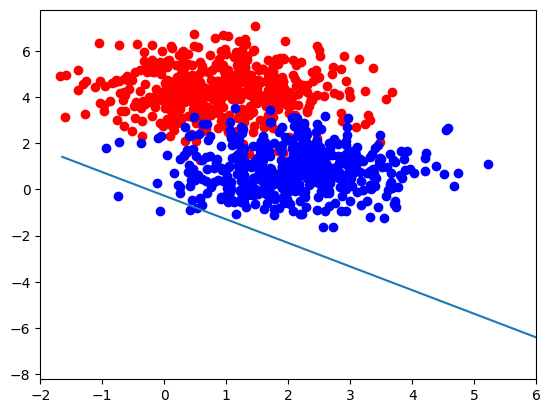

In [77]:
n_feature = data.shape[1]
n_samples = data.shape[0]

X = np.append(np.ones((n_samples, 1)), data, axis=1) #include intercept
y = labels.reshape(n_samples, 1)

theta = np.random.randn(n_feature+1).reshape(n_feature+1, 1) # initialize the weights (parameters)
 
print(f"Initial values of theta : {theta}")
cost, gradient = compute_cost(theta, X, y)
print(f"Initial gradient : {gradient}\nInitial cost {cost}")

plot_data_with_decision(data,labels, theta)

### Apply gradient descent to minimize the loss function

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [78]:
costs = []
iterations = 300
lr = 0.01 # the learning rate
for i in range(iterations):  
    cost, gradient = compute_cost(theta, X, y)
    theta -= (lr * gradient) # simultaneously update the parameters with thier respective gradients
    costs.append(cost)    

### Plotting the Convergence of $J(\theta)$
Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Values of Cost Function over iterations of Gradient Descent')

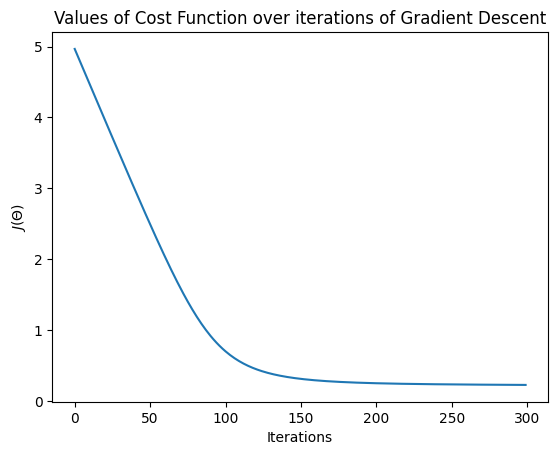

In [79]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent")

### Plot the final decision boundary

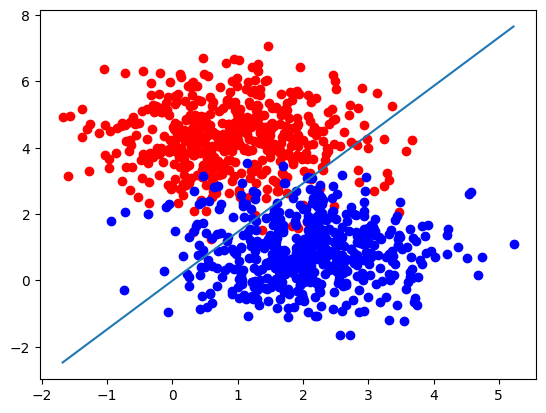

In [80]:
colors = {0:"red", 1:'blue'}
label_values = [0, 1]

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

for i in label_values:
    idx = np.where(labels == i)
    plt.scatter(data[idx, 0], data[idx, 1], c=colors[i])
plt.plot(x_boundary, y_boundary)
plt.show()

In [81]:
### Write a function to predict the label from the optimized parameters 
def predict(theta, x):
    pred_prod = sigmoid(np.dot(x, theta))
    return pred_prod > .5